In [31]:
import os

# Set the OMP_NUM_THREADS environment variable to 1
os.environ['OMP_NUM_THREADS'] = '1'

from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [32]:
df = pd.read_csv("income.csv")
df.head() # show 5 first value
# df # show all value

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


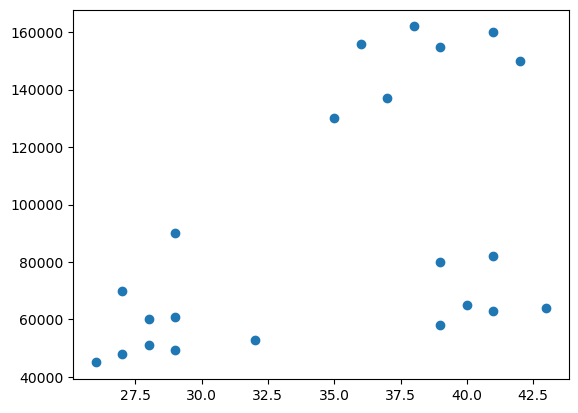

In [33]:
plt.scatter(df['Age'], df['Income($)'])

In [34]:
km = KMeans(n_clusters=3)
print(km)   

KMeans(n_clusters=3)


In [35]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [36]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


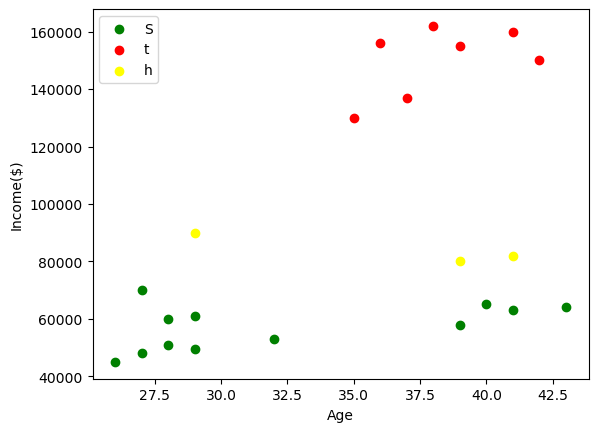

In [37]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='yellow')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend("Sth")

In [38]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [39]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [40]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [48]:
km.cluster_centers_

array([[0.82352941, 0.30769231],
       [0.08823529, 0.02884615],
       [0.68627451, 0.96296296],
       [0.58823529, 0.75641026],
       [0.86764706, 0.14957265],
       [0.17647059, 0.38461538],
       [0.35294118, 0.06837607],
       [0.11764706, 0.15954416],
       [0.91176471, 0.94017094]])

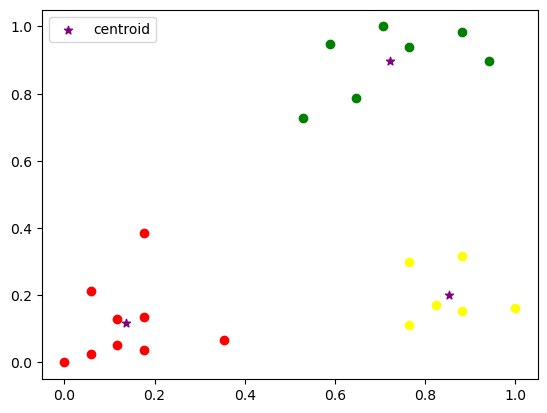

In [42]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='yellow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.legend()

In [43]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [44]:
sse

[5.434011511988179,
 2.3456144914725936,
 0.4750783498553097,
 0.38815291664787444,
 0.2755825568722976,
 0.23436626485472348,
 0.1685851223602976,
 0.1549393121865248,
 0.10188787724979426]

In [46]:
# Find Elbow
from kneed import KneeLocator

# Assuming `sse` is your list of SSE values and `k_rng` is the range of k values you tested
knee_locator = KneeLocator(list(k_rng), sse, curve='convex', direction='decreasing')

print("Elbow point at k =", knee_locator.elbow)

Elbow point at k = 3


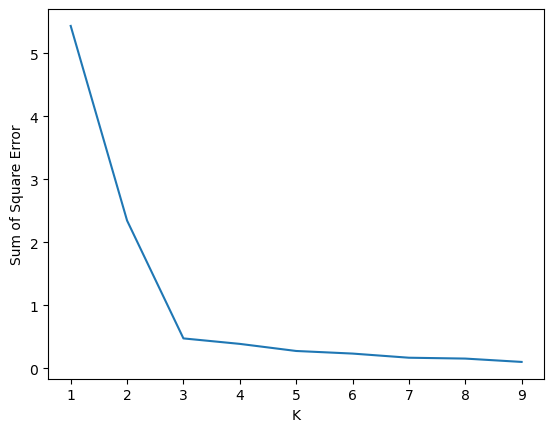

In [45]:
plt.xlabel('K')
plt.ylabel('Sum of Square Error')
plt.plot(k_rng, sse)